In [52]:
from pygooglenews import GoogleNews

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os
from scipy.ndimage import gaussian_gradient_magnitude

import pandas as pd
import numpy as np

In [53]:
gn = GoogleNews(lang='en', country = 'US')

In [54]:
searched_topic = 'Russia'
duration = '1m'

In [55]:
result = gn.search(searched_topic, when=duration)
titles = []
for i in result['entries']:
    titles.append(i['title'])


In [56]:
title_words = ''
stopwords = set(STOPWORDS)

In [57]:
for val in titles:
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    title_words += " ".join(tokens)+" "

### WordCloud

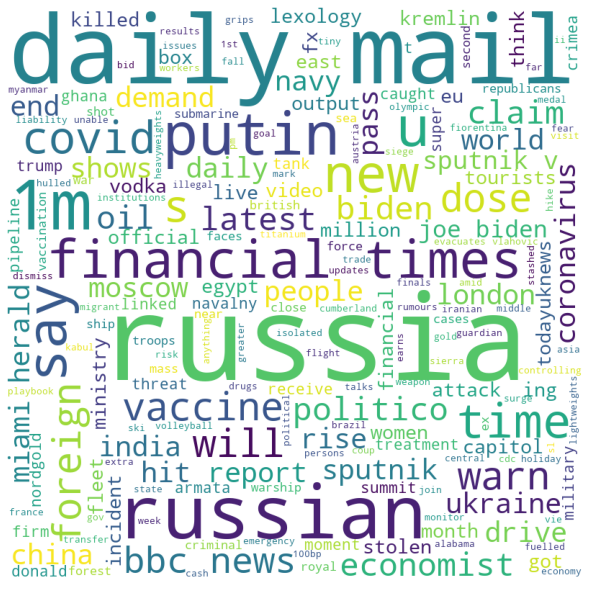

In [58]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10)
wordcloud.generate(title_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### WordCloud на карте

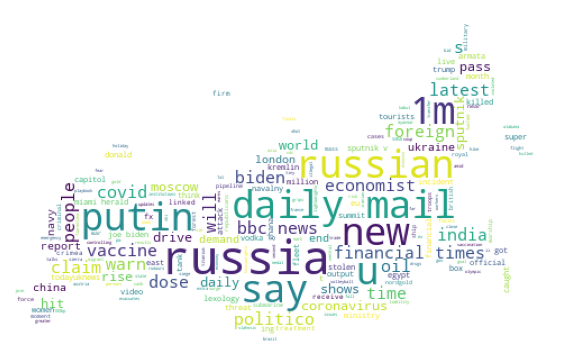

In [60]:
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
color = np.array(Image.open(os.path.join(d, "russia.jpg")))
color = color[::2, ::2]

mask = color.copy()
mask[mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(color[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > .08] = 255

wc = WordCloud(max_words=2000, relative_scaling=0, mask=mask, width = 800, height = 800, background_color ='white', stopwords = stopwords)

wc.generate(title_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.axis("off")
plt.imshow(wc)